SOM2用にSOMの関数化を行う  
import numpy as np  
numpy はインポートしてね

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

SOM クラス化

In [4]:
class SOM:
    
    def __init__(self,
                 
        #近傍半径の設定
        sig_zero = 1.0,
        sig_min = 0.05,
        Tau = 50.0,
        
        #ノード設定
        K = 100,
        D = 1):
        
        self.K = K
        self.D = D
        
        #近傍半径の設定
        self.sig_zero = sig_zero
        self.sig_min = sig_min
        self.Tau = Tau

    def initialize(self ,X):
        self.n = np.size(X ,axis = 0)
        self.m = np.size(X ,axis = 1)
        self.X = X
        
        #潜在変数の初期化
        zn = np.random.rand(self.n ,2)
        #zn = np.reshape(zn ,(self.n ,1))
        self.zn = zn
        
        #ノード設定
        resolution = 10
        zeta = np.meshgrid(np.linspace(-1 ,1 ,resolution) ,np.linspace(1 ,-1 ,resolution))
        zeta = np.dstack(zeta)
        zeta = zeta.reshape(resolution**2 ,-1)
        zeta.shape
        self.zeta = zeta

        #学習率初期設定
        h_kn = np.zeros((self.n ,self.K))
        self.h_kn = h_kn

        #ノード毎学習率合計変数の初期設定
        g_k = np.zeros((self.K))
        g_k = np.reshape(g_k ,(self.K ,self.D))
        self.g_k = g_k

        #参照ベクトル計算の中で使う変数の初期設定
        h_X = np.zeros((self.n ,2))
        self.h_X = h_X

        #参照ベクトル初期設定
        y_k = np.zeros((self.K ,2))
        self.y_k = y_k

        #潜在変数初期設定
        k_n = np.zeros((self.n))
        k_n = np.reshape(k_n ,(self.n ,self.D))
        self.k_n = k_n
    
    def sig(self, T):
        #近傍半径の設定   
        sig = 0
        sig_t_s = np.zeros((T))
        #for sig > sig_min:
        for t in range(T):
            sig_max = self.sig_zero-(self.sig_zero - self.sig_min) * t / self.Tau
            if sig_max > self.sig_min:
                sig = sig_max
            else:
                sig = self.sig_min
            sig_t_s[t] = sig
            self.sig_zero = sig_max
        self.sig_t = sig_t_s

    def fit(self, time):
        #print(self.n)
        #self.sig(T)
        #print(self.sig_t)
        for data in range(self.n):
            xn_yk_min = np.power(self.X[data][0] - self.y_k[0][0], 2) + np.power(self.X[data][1] - self.y_k[0][1], 2)
            Nd = 0
            for node in range(1 ,self.K):
                xn_yk = np.power(self.X[data][0] - self.y_k[node][0], 2) + np.power(self.X[data][1] - self.y_k[node][1], 2)
                if xn_yk_min > xn_yk:
                    xn_yk_min = xn_yk
                    Nd = node
            self.k_n[data] = Nd

        for data in range(self.n):
            self.zn[data] = self.zeta[int(self.k_n[data])]  
            
        
        for data in range(self.n):
            for node in range(self.K):
                self.h_kn[data][node] = np.exp(-1 / (2*np.power(self.sig_t[time], 2)) * (np.power(self.zn[data][0] - self.zeta[node][0] ,2) - np.power(self.zn[data][1] - self.zeta[node][1] ,2)))

        for node in range(self.K):
            self.g_k[node] = np.sum(self.h_kn[:,node])

        for node in range(self.K):
            for data in range(self.n):
                self.h_X[data] = self.h_kn[data][node] * self.X[data]
            #print("h_X" ,np.size(h_X ,axis = 0) ,np.size(h_X ,axis = 1))
            self.y_k[node] = 1/self.g_k[node] * np.sum(self.h_X ,axis=0)

          


In [33]:
class SOM_p:
    
    def __init__(self,
                 
        #近傍半径の設定
        sig_zero = 1.0,
        sig_min = 0.05,
        Tau = 50.0,
        
        #ノード設定
        K = 25,
        D = 1):
        
        self.K = K
        self.D = D
        
        #近傍半径の設定
        self.sig_zero = sig_zero
        self.sig_min = sig_min
        self.Tau = Tau

    def initialize(self ,X):
        self.n = np.size(X ,axis = 0)
        self.m = np.size(X ,axis = 1)
        self.X = X
        
        #潜在変数の初期化
        zi = np.random.rand(self.n ,2)
        self.zi = zi
        
        #ノード設定
        resolution = 5
        zeta = np.meshgrid(np.linspace(-1 ,1 ,resolution) ,np.linspace(1 ,-1 ,resolution))
        zeta = np.dstack(zeta)
        zeta = zeta.reshape(resolution**2 ,-1)
        zeta.shape
        self.zeta = zeta

        #学習率初期設定
        h_il = np.zeros((self.n ,self.K))
        self.h_il = h_il

        #ノード毎学習率合計変数の初期設定
        g_l = np.zeros((self.K))
        g_l = np.reshape(g_l ,(self.K ,self.D))
        self.g_l = g_l

        #参照ベクトル計算の中で使う変数の初期設定
        #h_v = np.zeros((self.K))
        h_v = np.zeros((self.K ,self.m))
        self.h_v = h_v

        #参照ベクトル初期設定
        w_l = np.zeros((self.K ,self.m))
        self.w_l = w_l
        
        #潜在変数初期設定
        l_i = np.zeros((self.n))
        l_i = np.reshape(l_i ,(self.n ,self.D))
        self.l_i = l_i
    
    def sig(self, T):
        #近傍半径の設定   
        sig = 0
        sig_t_s = np.zeros((T))
        #for sig > sig_min:
        for t in range(T):
            sig_max = self.sig_zero-(self.sig_zero - self.sig_min) * t / self.Tau
            if sig_max > self.sig_min:
                sig = sig_max
            else:
                sig = self.sig_min
            sig_t_s[t] = sig
            self.sig_zero = sig_max
        self.sig_t = sig_t_s

    def fit(self, time):
        #print(self.n)
        #self.sig(T)
        #print(self.sig_t)
        for data in range(self.n):
            xn_yk_min = 0
            for node in range(self.m):
                xn_yk_min += np.power(self.X[data][node] - self.w_l[0][node], 2)
            Nd = 0
                
            for data2 in range(1 ,self.n):
                xn_yk = 0
                for node in range(self.m):
                    xn_yk += np.power(self.X[data][node] - self.w_l[data2][node], 2)
                    if xn_yk_min > xn_yk:
                        xn_yk_min = xn_yk
                        Nd = node
            self.l_i[data] = Nd

        for data in range(self.n):
            self.zi[data] = self.zeta[int(self.l_i[data])]
        
        
        for data in range(self.n):
            for node in range(self.K):
                self.h_il[data][node] = np.exp(-1 / (2*np.power(self.sig_t[time], 2)) * (np.power(self.zi[data][0] - self.zeta[node][0] ,2) + np.power(self.zi[data][1] - self.zeta[node][1] ,2)))
        #print("h_il" ,np.size(self.h_il ,axis = 0) ,np.size(self.h_il ,axis = 1))
            
        for node in range(self.K):
            self.g_l[node] = np.sum(self.h_il[:,node])
        #print("h_v" ,np.size(self.h_v ,axis = 0) ,np.size(self.h_v ,axis = 1))
        w_l_h = []
        for node in range(self.K):
            for data in range(self.n):
                #self.h_v[node] = 1/self.g_l[node] * self.h_il[data][node] * self.X[data]
                w_l_h.append(self.h_il[data][node] * self.X[data])
        
        for node in range(self.K):
            self.w_l[node] = 1/self.g_l[node] * np.sum(w_l_h ,axis = 0)
        print("w_l_h" ,np.size(w_l_h ,axis = 0) ,np.size(w_l_h ,axis = 1))
        print("w_l" ,np.size(self.w_l ,axis = 0) ,np.size(self.w_l ,axis = 1))
            

In [46]:
file = 9
D = 2
som = []
v = []
epoc = 5

for file_num in range(file):
    file_name = "data" + str(file_num + 1) + ".txt"
    X = np.loadtxt(file_name)
    som.append(SOM())
    som[file_num].initialize(X)
    som[file_num].sig(epoc)

inip = np.zeros((9 ,200))    
som_p = SOM_p()
som_p.initialize(inip)
som_p.sig(epoc)

In [42]:
for epoc_num in range(epoc):
    print("epoc = " ,epoc_num+1)
    for file_num in range(file):   
        som[file_num].fit(epoc_num)
        #k_size = np.size(ch_som ,axis=0)
        ch_som = som[file_num].y_k
        #ch_som.flatten()
        v.append(ch_som.flatten())
        #print("CH_SOM"+str(file_num+1))

epoc =  1
epoc =  2
epoc =  3
epoc =  4
epoc =  5


In [43]:
som_p.X = v
som_p.fit(epoc_num)

w_l_h 225 200
w_l 25 200


In [49]:
som_p.l_i

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [19]:
som_p.zi

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [21]:
som_p.zeta

array([[-1. ,  1. ],
       [-0.5,  1. ],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 1. ,  1. ],
       [-1. ,  0.5],
       [-0.5,  0.5],
       [ 0. ,  0.5],
       [ 0.5,  0.5],
       [ 1. ,  0.5],
       [-1. ,  0. ],
       [-0.5,  0. ],
       [ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 1. ,  0. ],
       [-1. , -0.5],
       [-0.5, -0.5],
       [ 0. , -0.5],
       [ 0.5, -0.5],
       [ 1. , -0.5],
       [-1. , -1. ],
       [-0.5, -1. ],
       [ 0. , -1. ],
       [ 0.5, -1. ],
       [ 1. , -1. ]])

In [20]:
som[0].zn

array([[-0.11111111, -1.        ],
       [ 0.11111111,  1.        ],
       [-1.        ,  1.        ],
       [ 1.        , -1.        ],
       [-1.        ,  1.        ],
       [-1.        , -1.        ],
       [ 1.        , -1.        ],
       [-1.        , -0.77777778],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [ 1.        ,  0.33333333],
       [-1.        ,  0.33333333],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [ 1.        , -1.        ],
       [-1.        ,  1.        ],
       [-0.11111111,  1.        ],
       [-0.77777778, -1.        ],
       [-1.        , -1.        ],
       [ 0.55555556, -1.        ],
       [-1.        , -1.        ],
       [-1.        , -0.33333333],
       [ 1.        ,  0.11111111],
       [ 1.        ,  0.11111111],
       [ 1.        , -1.        ],
       [ 1.        , -1.        ],
       [ 1.        , -1.        ],
       [ 1.        ,

In [92]:
w_li = []
for i in range(9):
    w_li.append(som_p.w_l[int(som_p.l_i[i])])

In [62]:
for num in range(file):
    for k in range(100):
        som[num].y_k[k][0] = som_p.w_l[num][2*k]
        som[num].y_k[k][1] = som_p.w_l[num][2*k+1]

In [47]:
for epoc_num in range(epoc):
    print("epoc = " ,epoc_num+1)
    v = []
    for file_num in range(file):   
        som[file_num].fit(epoc_num)
        #k_size = np.size(ch_som ,axis=0)
        ch_som = som[file_num].y_k
        #ch_som.flatten()
        v.append(ch_som.flatten())
        #print("CH_SOM"+str(file_num+1))
    
    print(v)
    
    som_p.X = v
    som_p.fit(epoc_num)
    w_li = []
    for i in range(9):
        w_li.append(som_p.w_l[int(som_p.l_i[i])])

    for num in range(file):
        for k in range(100):
            som[num].y_k[k][0] = w_li[num][2*k]
            som[num].y_k[k][1] = w_li[num][2*k+1]

epoc =  1
[array([-1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.5008

[array([-1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
       -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
       -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.5

[array([-1.72448203, -1.12942675, -1.68840074, -1.19289064, -1.64532166,
       -1.26830792, -1.59559302, -1.35504145, -1.54080679, -1.45032386,
       -1.48381491, -1.54923741, -1.42819485, -1.64563701, -1.37732116,
       -1.73374306, -1.33352119, -1.80958439, -1.29773074, -1.87158063,
       -1.72448203, -1.12942675, -1.68840074, -1.19289064, -1.64532166,
       -1.26830792, -1.59559302, -1.35504145, -1.54080679, -1.45032386,
       -1.48381491, -1.54923741, -1.42819485, -1.64563701, -1.37732116,
       -1.73374306, -1.33352119, -1.80958439, -1.29773074, -1.87158063,
       -1.72448203, -1.12942675, -1.68840074, -1.19289064, -1.64532166,
       -1.26830792, -1.59559302, -1.35504145, -1.54080679, -1.45032386,
       -1.48381491, -1.54923741, -1.42819485, -1.64563701, -1.37732116,
       -1.73374306, -1.33352119, -1.80958439, -1.29773074, -1.87158063,
       -1.72448203, -1.12942675, -1.68840074, -1.19289064, -1.64532166,
       -1.26830792, -1.59559302, -1.35504145, -1.54080679, -1.4

[array([-1.68182748, -1.24585768, -1.65022798, -1.29841529, -1.61739282,
       -1.35193161, -1.58354741, -1.40587409, -1.548938  , -1.45969226,
       -1.51382092, -1.51284245, -1.47845161, -1.56481162, -1.44307442,
       -1.6151379 , -1.40791411, -1.66342628, -1.37316965, -1.70935845,
       -1.68182748, -1.24585768, -1.65022798, -1.29841529, -1.61739282,
       -1.35193161, -1.58354741, -1.40587409, -1.548938  , -1.45969226,
       -1.51382092, -1.51284245, -1.47845161, -1.56481162, -1.44307442,
       -1.6151379 , -1.40791411, -1.66342628, -1.37316965, -1.70935845,
       -1.68182748, -1.24585768, -1.65022798, -1.29841529, -1.61739282,
       -1.35193161, -1.58354741, -1.40587409, -1.548938  , -1.45969226,
       -1.51382092, -1.51284245, -1.47845161, -1.56481162, -1.44307442,
       -1.6151379 , -1.40791411, -1.66342628, -1.37316965, -1.70935845,
       -1.68182748, -1.24585768, -1.65022798, -1.29841529, -1.61739282,
       -1.35193161, -1.58354741, -1.40587409, -1.548938  , -1.4

[array([-1.78334869, -1.05007472, -1.74584986, -1.1144896 , -1.70563385,
       -1.18293642, -1.66346169, -1.25405239, -1.62028233, -1.32619822,
       -1.57713605, -1.39762785, -1.53503997, -1.4666806 , -1.49488221,
       -1.53195074, -1.45734754, -1.59239898, -1.42288492, -1.6473918 ,
       -1.78334869, -1.05007472, -1.74584986, -1.1144896 , -1.70563385,
       -1.18293642, -1.66346169, -1.25405239, -1.62028233, -1.32619822,
       -1.57713605, -1.39762785, -1.53503997, -1.4666806 , -1.49488221,
       -1.53195074, -1.45734754, -1.59239898, -1.42288492, -1.6473918 ,
       -1.78334869, -1.05007472, -1.74584986, -1.1144896 , -1.70563385,
       -1.18293642, -1.66346169, -1.25405239, -1.62028233, -1.32619822,
       -1.57713605, -1.39762785, -1.53503997, -1.4666806 , -1.49488221,
       -1.53195074, -1.45734754, -1.59239898, -1.42288492, -1.6473918 ,
       -1.78334869, -1.05007472, -1.74584986, -1.1144896 , -1.70563385,
       -1.18293642, -1.66346169, -1.25405239, -1.62028233, -1.3

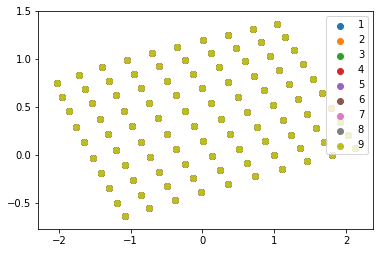

In [48]:
plt.scatter(som[0].y_k[:,0],som[0].y_k[:,1], label="1")
#plt.scatter(som[0].X[:,0],som[0].X[:,1], label="x1")
plt.scatter(som[1].y_k[:,0],som[1].y_k[:,1], label="2")
#plt.scatter(som[1].X[:,0],som[1].X[:,1], label="x1")
plt.scatter(som[2].y_k[:,0],som[2].y_k[:,1], label="3")
#plt.scatter(som[2].X[:,0],som[2].X[:,1], label="x1")
plt.scatter(som[3].y_k[:,0],som[3].y_k[:,1], label="4")
#plt.scatter(som[3].X[:,0],som[3].X[:,1], label="x1")
plt.scatter(som[4].y_k[:,0],som[4].y_k[:,1], label="5")
#plt.scatter(som[4].X[:,0],som[4].X[:,1], label="x1")
plt.scatter(som[5].y_k[:,0],som[5].y_k[:,1], label="6")
#plt.scatter(som[5].X[:,0],som[5].X[:,1], label="x1")
plt.scatter(som[6].y_k[:,0],som[6].y_k[:,1], label="7")
#plt.scatter(som[6].X[:,0],som[6].X[:,1], label="x1")
plt.scatter(som[7].y_k[:,0],som[7].y_k[:,1], label="8")
#plt.scatter(som[7].X[:,0],som[7].X[:,1], label="x1")
plt.scatter(som[8].y_k[:,0],som[8].y_k[:,1], label="9")
#plt.scatter(som[8].X[:,0],som[8].X[:,1], label="x1")
#plt.scatter(som_p.w_l[:,0],som_p.w_l[:,1], label="p")
#plt.scatter(som_p.zeta[:,0],som_p.zeta[:,1], label="zeta")
plt.legend()
plt.show()

In [99]:
np.size(w_li,axis=0)

9

In [100]:
np.size(w_li,axis=1)

200

In [9]:
v

[array([-1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.50088887, -1.51810923,
        -1.50088887, -1.51810923, -1.50088887, -1.51810923, -1.50088887,
        -1.51810923, -1.50088887, -1.51810923, -1.5